<a href="https://colab.research.google.com/github/SiddhiDubey/eda-using-python/blob/main/majorproject0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install scikit-plot


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import re
import string
from wordcloud import WordCloud
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from scikitplot.metrics import plot_confusion_matrix, plot_roc

In [ ]:
data = pd.read_excel('/content/sample_data/dataset.xlsx')
data.head()

,text,label
0,oh my gosh,1.0
1,"trouble sleeping, confused mind, restless hear...",1.0
2,"All wrong, back off dear, forward doubt. Stay ...",1.0
3,I've shifted my focus to something else but I'...,1.0
4,"I'm restless and restless, it's been a month n...",1.0


In [ ]:
data.label.value_counts()


0.0    6247
1.0     733
Name: label, dtype: int64

In [ ]:
data.shape

(6982, 2)

In [ ]:
data = data.sample(frac = 1)
data.head()

,text,label
4235,Starting to get emotional waiting for people f...,0.0
6581,Alhamdulillah,0.0
6572,"â€œMiwako, youâ€™re more like a cop and handso...",0.0
4632,How does it feel to be accused of something we...,0.0
1118,Come baby,0.0


In [ ]:
data.isnull().sum()


text     10
label     2
dtype: int64

In [ ]:
data.dropna()


,text,label
4235,Starting to get emotional waiting for people f...,0.0
6581,Alhamdulillah,0.0
6572,"â€œMiwako, youâ€™re more like a cop and handso...",0.0
4632,How does it feel to be accused of something we...,0.0
1118,Come baby,0.0
...,...,...
4321,"Medet, wed...",0.0
3821,gojo twink,0.0
5093,SS! mutualan let's rt,0.0
5239,I'm so dizzy taking care of inheritance ',0.0


In [ ]:
data=data.dropna(how='any')


In [ ]:
data.isnull().sum()


text     0
label    0
dtype: int64

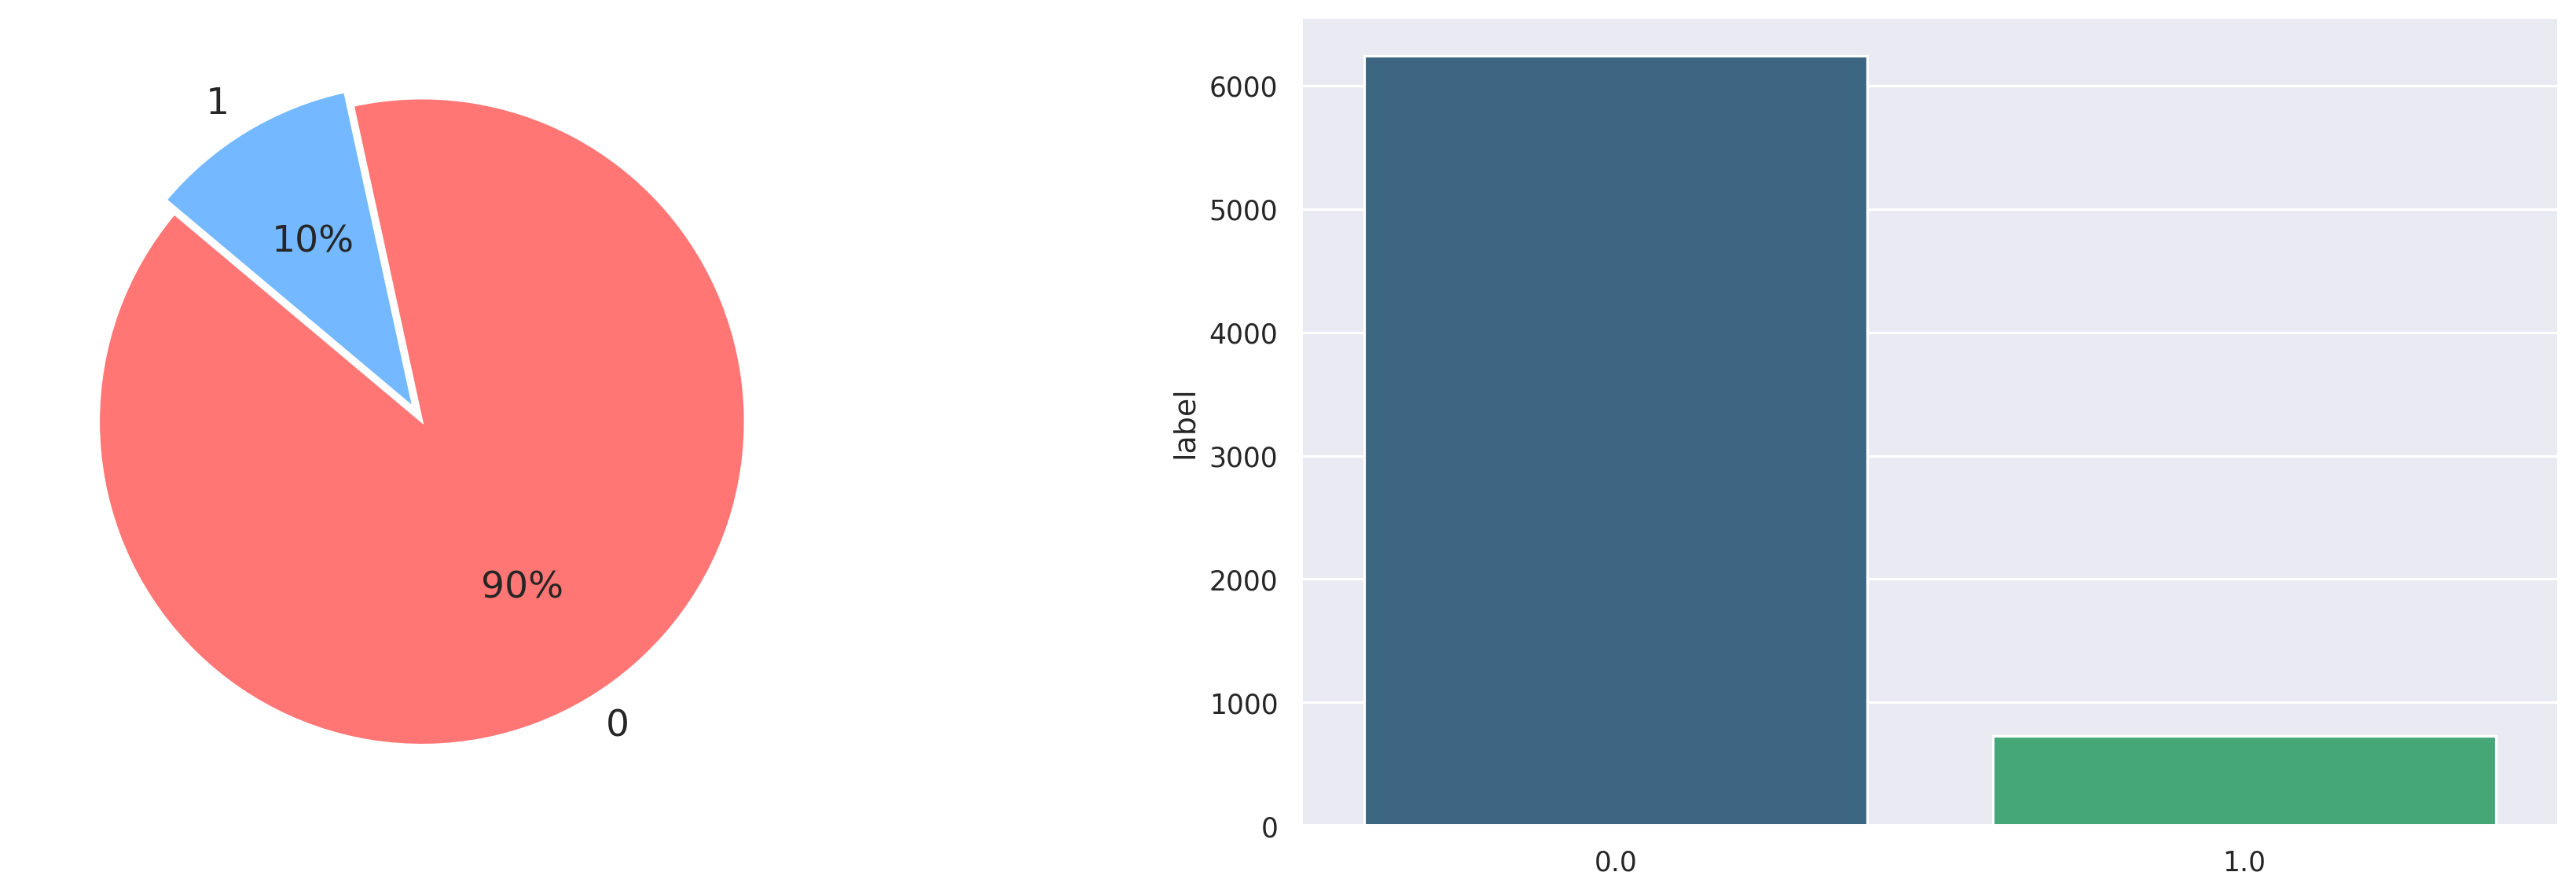

In [ ]:
labels = [0,1]
sizes = [6240, 730]
custom_colours = ['#ff7675', '#74b9ff']

plt.figure(figsize=(20, 6), dpi=227)
plt.subplot(1, 2, 1)
plt.pie(sizes, labels = labels, textprops={'fontsize': 15}, startangle=140, 
       autopct='%1.0f%%', colors=custom_colours, explode=[0, 0.05])

plt.subplot(1, 2, 2)
sns.barplot(x = data['label'].unique(), y = data['label'].value_counts(), palette= 'viridis')

plt.show()

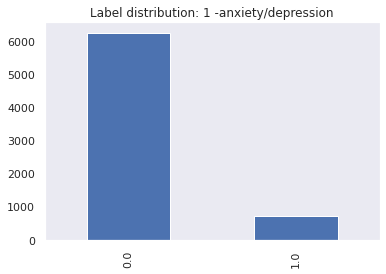

In [ ]:
data.label.value_counts().plot(kind='bar')
plt.title('Label distribution: 1 -anxiety/depression')
plt.grid()
plt.show()

In [108]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
import string
from bs4 import BeautifulSoup

In [109]:
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [110]:
def text_transformation(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [111]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}

In [112]:
def text_cleaner(text):
    newString = text.lower()
    newString = BeautifulSoup(newString, "lxml").text
    newString = re.sub(r'\([^)]*\)', '', newString)
    newString = re.sub('"','', newString)
    newString = ' '.join([contraction_mapping[t] if t in contraction_mapping else t for t in newString.split(" ")])    
    newString = re.sub(r"'s\b","",newString)
    newString = re.sub("[^a-zA-Z]", " ", newString) 
    newString = re.sub('[m]{2,}', 'mm', newString)
    return newString

In [114]:
data['cleaned'] = data["text"].apply(text_cleaner)


In [115]:
stop_words_cloud = stop_words
stop_words_cloud.append("i'm")
stop_words_cloud.append("i'll")
stop_words_cloud.append("i've")
stop_words_cloud.append("can't")
stop_words_cloud.append('ðÿ')
stop_words_cloud.append('â')

In [116]:
text_0 = " ".join(xx for xx in data.text[data.label==0])
text_1 = " ".join(xx for xx in data.text[data.label==1])

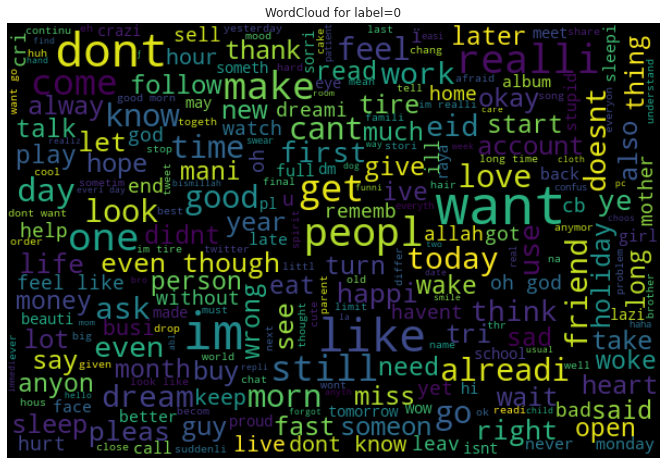

In [117]:
wordcloud = WordCloud(stopwords=stop_words_cloud, max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_0)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=0')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

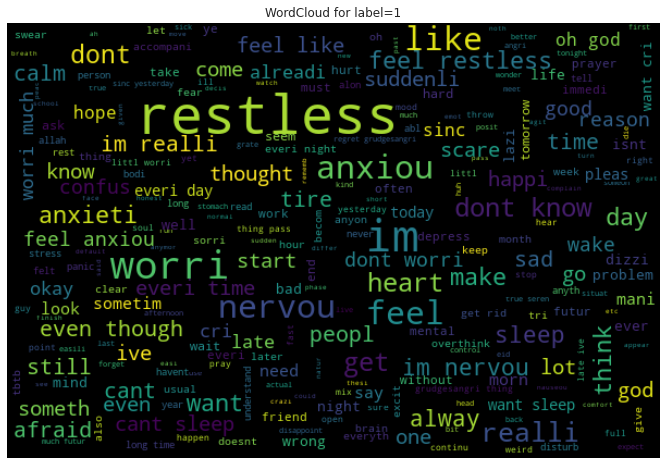

In [118]:
wordcloud = WordCloud(stopwords=stop_words_cloud, max_font_size=50, max_words=250,
                      width = 600, height = 400,
                      background_color='black').generate(text_1)
plt.figure(figsize=(12,8))
plt.title('WordCloud for label=1')
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

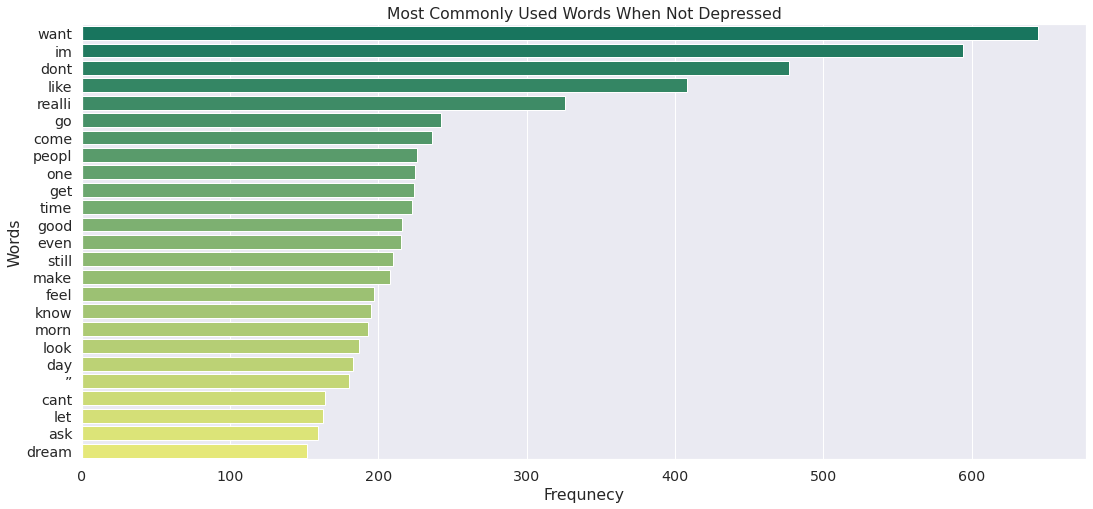

In [119]:
all_nodep_words = []
for sentence in data[data['label'] == 0]['text'].to_list():
    for word in sentence.split():
        all_nodep_words.append(word)

df = pd.DataFrame(Counter(all_nodep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Not Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

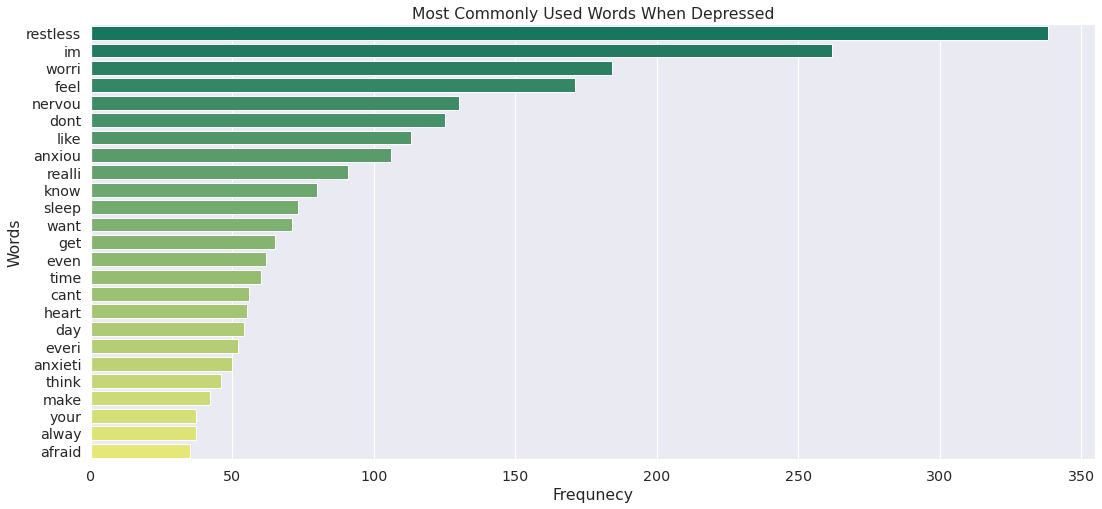

In [120]:
all_dep_words = []
for sentence in data[data['label'] == 1]['text'].to_list():
    for word in sentence.split():
        all_dep_words.append(word)

df = pd.DataFrame(Counter(all_dep_words).most_common(25), columns= ['Word', 'Frequency'])

sns.set_context('notebook', font_scale= 1.3)
plt.figure(figsize=(18,8))
sns.barplot(y = df['Word'], x= df['Frequency'], palette= 'summer')
plt.title("Most Commonly Used Words When Depressed")
plt.xlabel("Frequnecy")
plt.ylabel("Words")
plt.show()

In [122]:
X = data.cleaned
y = data.label

In [123]:
vect = TfidfVectorizer(max_features = 20000 , lowercase=False , ngram_range=(1,2),use_idf = True)


In [124]:
X_tfidf =vect.fit_transform(X).toarray()


In [125]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_tfidf,y,stratify = y,test_size = 0.2,random_state = 1)

In [127]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score


In [128]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier


lr_model = LogisticRegression(class_weight='balanced', max_iter=400)
dt_model = DecisionTreeClassifier(class_weight='balanced')
rf_model = RandomForestClassifier(class_weight='balanced')
mnb_model = MultinomialNB()
svm_model = SVC(class_weight='balanced')
knn_model = KNeighborsClassifier()
ada_model = AdaBoostClassifier()
model_names = ['Logistic Regression','Decision Tree','Random Forest','Naive Bayes', 'SVM', 'KNN', 'AdaBoost']
ml_models = [lr_model,dt_model,rf_model,mnb_model, svm_model, knn_model, ada_model]

In [130]:
trained_ml_models = []
def model_train(model, train_data, train_labels):
    mf = model.fit(train_data,train_labels)
    trained_ml_models.append(mf)
# trained_ml_models = []
for i in ml_models:
    model_train(i,X_train, y_train)
#     trained_ml_models.append(tt)

In [132]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [133]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score


pr_list = []
re_list = []
f1_list = []

def print_results(md, x_test, y_test, name):
    #print("\n\nClassifier: ", name)
    pred_y = md.predict(x_test)
    true, pred = y_test, pred_y

    pr_list.append((round(precision_score(y_test, pred_y, average='weighted'),4)*100)) 
    re_list.append((round(recall_score(y_test, pred_y, average='weighted'),4)*100))
    f1_list.append((round(f1_score(y_test, pred_y, average='weighted'),4)*100))

for i in range(len(trained_ml_models)):
    md = trained_ml_models[i]
    name = model_names[i]
    print_results(md, X_test, y_test, name)

performance_matrix = pd.DataFrame({'Precision':pr_list,
                                   'Recall':re_list,'F1 Score':f1_list},
                                  index =model_names)

In [135]:
performance_matrix

,Precision,Recall,F1 Score
Logistic Regression,98.40,98.42,98.41
Decision Tree,98.79,98.78,98.79
Random Forest,97.53,97.56,97.46
Naive Bayes,91.79,90.96,87.75
SVM,97.67,97.70,97.63
KNN,91.79,90.96,87.75
AdaBoost,98.56,98.57,98.56


In [136]:
data_matrix = pd.DataFrame({
    'Model':model_names,'Precision':pr_list,
                        'Recall':re_list,
                        'F1 Score':f1_list,
                      },
                    )

In [137]:
data_matrix

,Model,Precision,Recall,F1 Score
0,Logistic Regression,98.40,98.42,98.41
1,Decision Tree,98.79,98.78,98.79
2,Random Forest,97.53,97.56,97.46
3,Naive Bayes,91.79,90.96,87.75
4,SVM,97.67,97.70,97.63
5,KNN,91.79,90.96,87.75
6,AdaBoost,98.56,98.57,98.56


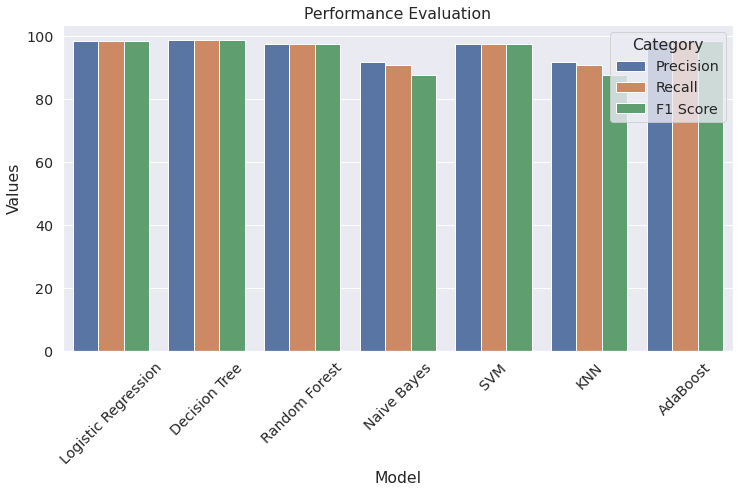

In [138]:
df_1 = pd.melt(data_matrix, id_vars="Model", var_name="Category", value_name="Values")
plt.figure(figsize=(12, 6))
ax = plt.subplot()

sns.barplot(data=df_1,x='Model', y='Values' ,hue='Category')
ax.set_xlabel('Model') 
ax.set_title('Performance Evaluation')

ax.xaxis.set_ticklabels(model_names, rotation=45);
plt.show()

In [139]:
def performance_eval(clf,X_test):
    y_pred = clf.predict(X_test)
    print(f'Accuracy : {accuracy_score(y_test,y_pred)}\n')
    print('   ------------ Classification Report -----------')
    print(classification_report(y_test,y_pred))
    print('   ------------ Confusion Matrix -------------- ')
    sns.set(rc={'figure.figsize':(10,6)})
    sns.heatmap(confusion_matrix(y_test,y_pred),annot = True,fmt = 'd')

Accuracy : 0.9490674318507891

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97      1248
         1.0       0.99      0.52      0.68       146

    accuracy                           0.95      1394
   macro avg       0.97      0.76      0.83      1394
weighted avg       0.95      0.95      0.94      1394

   ------------ Confusion Matrix -------------- 


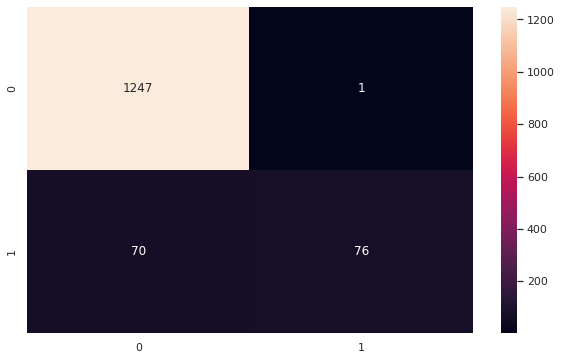

In [140]:
clf_lr = LogisticRegression()
clf_lr.fit(X_train, y_train)
performance_eval(clf_lr,X_test)

Accuracy : 0.9096126255380201

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1248
         1.0       1.00      0.14      0.24       146

    accuracy                           0.91      1394
   macro avg       0.95      0.57      0.60      1394
weighted avg       0.92      0.91      0.88      1394

   ------------ Confusion Matrix -------------- 


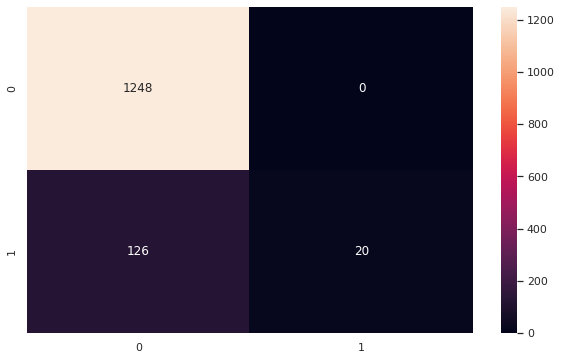

In [141]:
clf_nb = MultinomialNB()
clf_nb.fit(X_train, y_train)
performance_eval(clf_nb,X_test)

Accuracy : 0.9885222381635581

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99      1248
         1.0       0.93      0.96      0.95       146

    accuracy                           0.99      1394
   macro avg       0.96      0.98      0.97      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


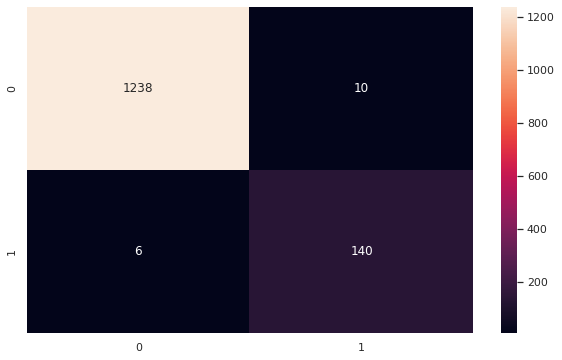

In [142]:
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train, y_train)
performance_eval(clf_dt,X_test)

Accuracy : 0.9705882352941176

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1248
         1.0       0.96      0.75      0.84       146

    accuracy                           0.97      1394
   macro avg       0.97      0.87      0.91      1394
weighted avg       0.97      0.97      0.97      1394

   ------------ Confusion Matrix -------------- 


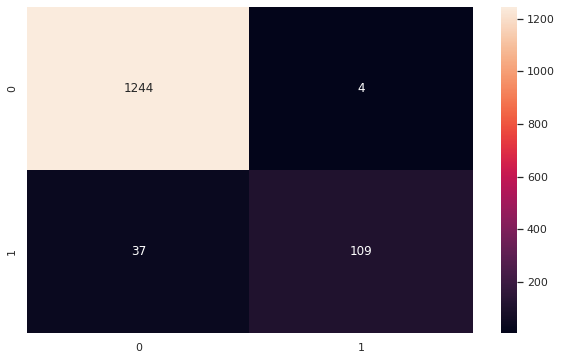

In [144]:
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
performance_eval(clf_svm,X_test)

Accuracy : 0.9096126255380201

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1248
         1.0       1.00      0.14      0.24       146

    accuracy                           0.91      1394
   macro avg       0.95      0.57      0.60      1394
weighted avg       0.92      0.91      0.88      1394

   ------------ Confusion Matrix -------------- 


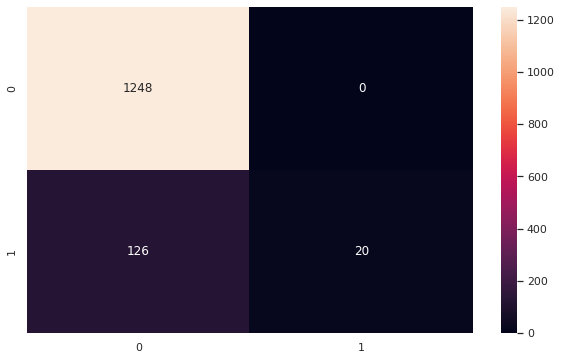

In [145]:
clf_knn = KNeighborsClassifier()
clf_knn.fit(X_train, y_train)
performance_eval(clf_knn,X_test)

Accuracy : 0.9863701578192252

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      1248
         1.0       0.94      0.93      0.93       146

    accuracy                           0.99      1394
   macro avg       0.96      0.96      0.96      1394
weighted avg       0.99      0.99      0.99      1394

   ------------ Confusion Matrix -------------- 


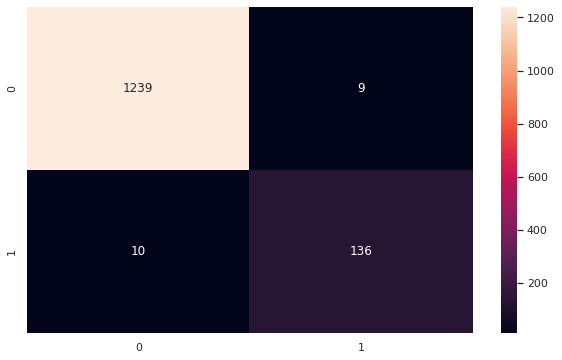

In [146]:
clf_adb = AdaBoostClassifier()
clf_adb.fit(X_train, y_train)
performance_eval(clf_adb,X_test)

Accuracy : 0.9799139167862266

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1248
         1.0       0.97      0.84      0.90       146

    accuracy                           0.98      1394
   macro avg       0.97      0.92      0.94      1394
weighted avg       0.98      0.98      0.98      1394

   ------------ Confusion Matrix -------------- 


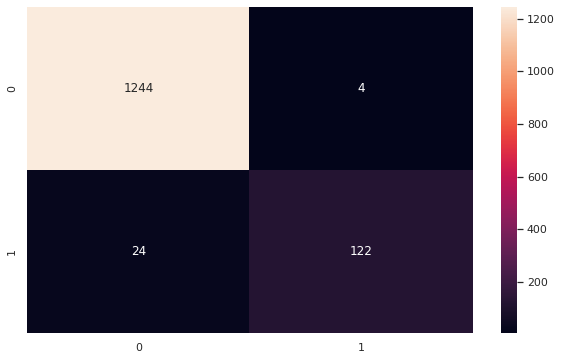

In [147]:
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train, y_train)
performance_eval(clf_rf,X_test)

In [148]:
from sklearn.ensemble import VotingClassifier


Accuracy : 0.96987087517934

   ------------ Classification Report -----------
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98      1248
         1.0       0.97      0.73      0.84       146

    accuracy                           0.97      1394
   macro avg       0.97      0.87      0.91      1394
weighted avg       0.97      0.97      0.97      1394

   ------------ Confusion Matrix -------------- 


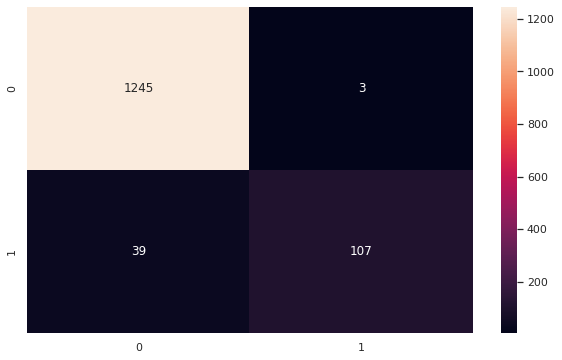

In [149]:
voting_clf = VotingClassifier(estimators=[('SVC', clf_svm),
                                          ('LogReg', clf_lr),
                                          ('RF', clf_rf),
                                          ('AdaBoost',clf_adb),
                                          ('KNN',clf_knn),
                                          ('NB',clf_nb),
                                          ('DT',clf_dt)
                                         ],
                              voting='hard'
                             )
voting_clf.fit(X_train, y_train)
performance_eval(voting_clf,X_test)

In [150]:
import pickle
filename = 'CV_BestModel.sav'
pickle.dump(voting_clf, open(filename, 'wb'))

In [151]:
text = "I am / exhauted :) and restless."


In [152]:
clean_text = text_cleaner(text)


In [153]:
clean_text


'i am   exhauted    and restless '

In [154]:
loaded_model = pickle.load(open('CV_BestModel.sav', 'rb'))
single_prediction = loaded_model.predict(vect.transform([clean_text]).toarray())[0]

In [155]:
output = {0:"No Anxiety/Depression",
          1:"Anxiety/Depression"}
print(output[single_prediction])

Anxiety/Depression
